In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import array
from numpy import hstack
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import LambdaCallback
from sklearn.preprocessing import MinMaxScaler
from datetime import date
import datetime
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('NewDataEntire.csv')

In [ ]:
df.head()

,Date,Close
0,2020-12-02 09:53,1.20583
1,2020-12-02 09:54,1.20577
2,2020-12-02 09:55,1.20586
3,2020-12-02 10:00,1.20552
4,2020-12-02 10:01,1.20542


In [ ]:
df.describe()

,Close
count,940403.000000
mean,1.200515
std,0.099416
min,1.034530
25%,1.127890
50%,1.178930
75%,1.226890
max,1.601420


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940403 entries, 0 to 940402
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    940403 non-null  object 
 1   Close   940403 non-null  float64
dtypes: float64(1), object(1)
memory usage: 14.3+ MB


In [ ]:
df1=df.copy()

In [ ]:
date=[]
for i in df['Date'].values:
  x=datetime.datetime.strptime(i, "%Y-%m-%d %H:%M").strftime("%Y-%m-%d")
  date.append(x)

In [ ]:
date=pd.DataFrame(date)

In [ ]:
df.head()

,Date,Close
0,2020-12-02 09:53,1.20583
1,2020-12-02 09:54,1.20577
2,2020-12-02 09:55,1.20586
3,2020-12-02 10:00,1.20552
4,2020-12-02 10:01,1.20542


In [ ]:
dataset = pd.merge(df, date, left_index=True, right_index=True)

In [ ]:
dataset

,Date,Close,0
0,2020-12-02 09:53,1.20583,2020-12-02
1,2020-12-02 09:54,1.20577,2020-12-02
2,2020-12-02 09:55,1.20586,2020-12-02
3,2020-12-02 10:00,1.20552,2020-12-02
4,2020-12-02 10:01,1.20542,2020-12-02
...,...,...,...
940398,2021-01-18 00:00,1.20772,2021-01-18
940399,2021-01-19 00:00,1.21276,2021-01-19
940400,2021-01-20 00:00,1.21094,2021-01-20
940401,2021-01-21 00:00,1.21674,2021-01-21


In [ ]:
dataset.drop('Date',axis=1,inplace=True)
#df.rename(columns={"A": "a", "B": "c"})
dataset.rename(columns={0:"Date"},inplace=True)

In [ ]:
dataset.columns

Index(['Close', 'Date'], dtype='object')

In [ ]:
dataset.head()

,Close,Date
0,1.20583,2020-12-02
1,1.20577,2020-12-02
2,1.20586,2020-12-02
3,1.20552,2020-12-02
4,1.20542,2020-12-02


In [ ]:
dataset['Date'].duplicated().sum()

936005

In [ ]:
dataset1=dataset.copy()

In [ ]:
dataset.shape

(940403, 2)

In [ ]:
dataset1.shape

(940403, 2)

In [ ]:
d=dataset1['Date'].drop_duplicates()

In [ ]:
dd=pd.merge(dataset1,d,left_index=True, right_index=True)

In [ ]:
dataset1

,Close,Date
0,1.20583,2020-12-02
1,1.20577,2020-12-02
2,1.20586,2020-12-02
3,1.20552,2020-12-02
4,1.20542,2020-12-02
...,...,...
940398,1.20772,2021-01-18
940399,1.21276,2021-01-19
940400,1.21094,2021-01-20
940401,1.21674,2021-01-21


In [ ]:
dd

,Close,Date_x,Date_y
0,1.20583,2020-12-02,2020-12-02
842,1.21121,2020-12-03,2020-12-03
2268,1.21444,2020-12-04,2020-12-04
3588,1.21305,2020-12-06,2020-12-06
3708,1.21203,2020-12-07,2020-12-07
...,...,...,...
725339,1.31211,2013-01-08,2013-01-08
725387,1.30836,2013-01-09,2013-01-09
725435,1.30548,2013-01-10,2013-01-10
725483,1.32617,2013-01-11,2013-01-11


In [ ]:
dd.drop("Date_x",axis=1,inplace=True)

In [ ]:
dd.head()

,Close,Date_y
0,1.20583,2020-12-02
842,1.21121,2020-12-03
2268,1.21444,2020-12-04
3588,1.21305,2020-12-06
3708,1.21203,2020-12-07


In [ ]:
dd=dd.set_index("Date_y")

In [ ]:
dataset.describe()

,Close
count,940403.000000
mean,1.200515
std,0.099416
min,1.034530
25%,1.127890
50%,1.178930
75%,1.226890
max,1.601420


In [ ]:
dd

,Close
Date_y,
2020-12-02,1.20583
2020-12-03,1.21121
2020-12-04,1.21444
2020-12-06,1.21305
2020-12-07,1.21203
...,...
2013-01-08,1.31211
2013-01-09,1.30836
2013-01-10,1.30548


In [ ]:
dataset=dataset.set_index("Date")

In [ ]:
dataset.head()

,Close
Date,
2020-12-02,1.20583
2020-12-02,1.20577
2020-12-02,1.20586
2020-12-02,1.20552
2020-12-02,1.20542


In [ ]:
df['Close']

0         1.20583
1         1.20577
2         1.20586
3         1.20552
4         1.20542
           ...   
940398    1.20772
940399    1.21276
940400    1.21094
940401    1.21674
940402    1.21667
Name: Close, Length: 940403, dtype: float64

# **Scaling our data (Close Column)**

spliting our data into train and test

In [ ]:
train = dd[: int(len(dd)*.9)]
test = dd[int(len(dd)*.9): ]

In [ ]:
train

,Close
Date_y,
2020-12-02,1.20583
2020-12-03,1.21121
2020-12-04,1.21444
2020-12-06,1.21305
2020-12-07,1.21203
...,...
2011-08-14,1.42567
2011-08-15,1.42759
2011-08-16,1.44369


In [ ]:
train.shape

(3958, 1)

In [ ]:
test.shape

(440, 1)

# define input **sequence**

in this function we are appending train and test and for each x and y, and we are including our time stamp which is 60

In [ ]:
def prepare_data(data, n_features):
    X, y =[],[]
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
steps=60
X_train,y_train = prepare_data(train.values,steps)
X_test, y_test= prepare_data(test.values,steps)

# **split into samples**

as we can see the shapes of the train and tests data

In [ ]:
print(X_train.shape , y_train.shape)

(3898, 60, 1) (3898, 1)


In [ ]:
print(X_test.shape,y_test.shape)

(380, 60, 1) (380, 1)


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train

array([[[1.20583],
        [1.21121],
        [1.21444],
        ...,
        [1.16441],
        [1.16515],
        [1.1763 ]],

       [[1.21121],
        [1.21444],
        [1.21305],
        ...,
        [1.16515],
        [1.1763 ],
        [1.17192]],

       [[1.21444],
        [1.21305],
        [1.21203],
        ...,
        [1.1763 ],
        [1.17192],
        [1.17892]],

       ...,

       [[1.45861],
        [1.46816],
        [1.45978],
        ...,
        [1.42148],
        [1.42567],
        [1.42759]],

       [[1.46816],
        [1.45978],
        [1.45156],
        ...,
        [1.42567],
        [1.42759],
        [1.44369]],

       [[1.45978],
        [1.45156],
        [1.43279],
        ...,
        [1.42759],
        [1.44369],
        [1.43838]]])

# **Model Building**

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(SimpleRNN(100, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(SimpleRNN(50, activation='relu', return_sequences=True))
model.add(SimpleRNN(25, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
score=model.fit(X_train, y_train, epochs = 20, batch_size=64,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
61/61 [==============================] - 11s 88ms/step - loss: 1.2146 - val_loss: 0.5443
Epoch 2/20
61/61 [==============================] - 5s 88ms/step - loss: 0.3807 - val_loss: 0.1245
Epoch 3/20
61/61 [==============================] - 6s 97ms/step - loss: 0.0570 - val_loss: 0.0057
Epoch 4/20
61/61 [==============================] - 5s 82ms/step - loss: 0.0060 - val_loss: 2.3526e-04
Epoch 5/20
61/61 [==============================] - 6s 105ms/step - loss: 0.0029 - val_loss: 6.8431e-04
Epoch 6/20
61/61 [==============================] - 5s 80ms/step - loss: 0.0017 - val_loss: 7.2813e-04
Epoch 7/20
61/61 [==============================] - 6s 99ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 8/20
61/61 [==============================] - 5s 87ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/20
61/61 [==============================] - 5s 85ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/20
61/61 [==============================] - 6s 103ms/step - loss: 0.0012 - val_loss: 7

In [ ]:
trainPrediction = model.predict(X_train)
testPrediction = model.predict(X_test)

12/12 [==============================] - 0s 20ms/step


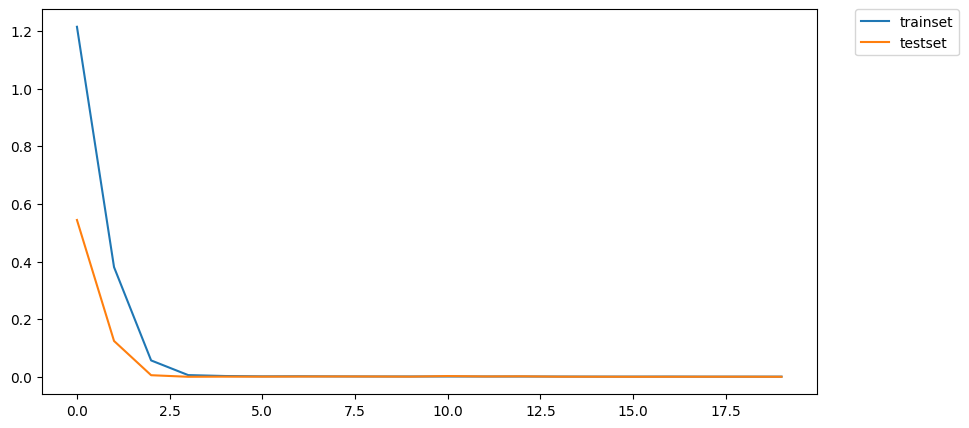

In [ ]:
losses = score.history['loss']
val_losses = score.history['val_loss']
plt.figure(figsize=(10,5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
testPrediction = testPrediction.reshape(-1, 1)

In [ ]:
testPrediction = testPrediction.reshape(-1, 1)

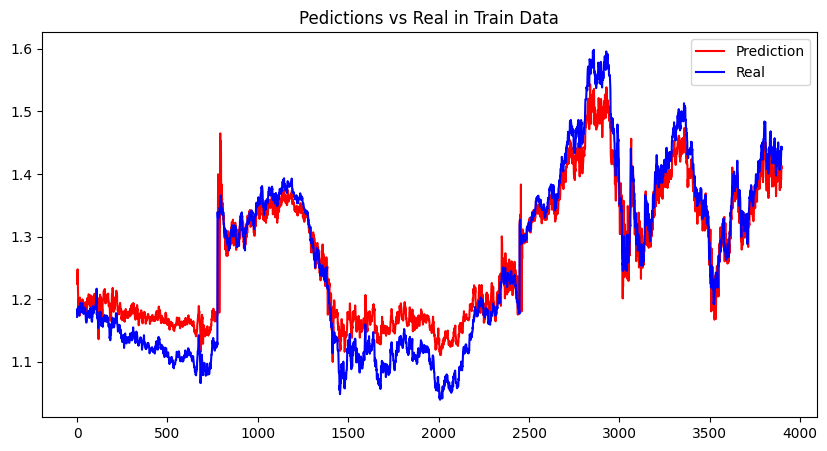

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(len(trainPrediction)),trainPrediction[ :,0], '-r', label="Prediction")
plt.plot(range(len(y_train)),y_train, '-b', label="Real")
plt.legend(loc="upper right")
plt.title('Pedictions vs Real in Train Data')
plt.show()